In [2]:
import os 

os.environ['SCIPY_ARRAY_API'] = '1'
os.environ['SKLEARN_ARRAY_API_DISPATCH'] = 'True'

In [3]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib

import catboost as cap
from scipy import stats
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE


In [4]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [6]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
sns.set(style='whitegrid')

In [7]:
df = pd.read_csv(r"C:/Users/ASUS/OneDrive/Desktop/Aviation-damage-prediction/data/AviationData.csv", 
                 encoding='windows-1252')

df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [8]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [10]:
info_dict = {
    'column' : df.columns.tolist(),
    'non-null count': df.count().tolist(),
    'dtype': df.dtypes.tolist(),
    'null-percentage': np.round(( 87282 - df.count()) * 100/87282)
}

descriptn = pd.DataFrame(info_dict).reset_index().drop('index', axis=1)
descriptn

,column,non-null count,dtype,null-percentage
0,Event.Id,88889,object,-2.0
1,Investigation.Type,88889,object,-2.0
2,Accident.Number,88889,object,-2.0
3,Event.Date,88889,object,-2.0
4,Location,88837,object,-2.0
5,Country,88663,object,-2.0
6,Latitude,34382,object,61.0
7,Longitude,34373,object,61.0
8,Airport.Code,50132,object,43.0
9,Airport.Name,52704,object,40.0


In [11]:
df.describe(include='object', exclude=np.number)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,87889,85695,32287,87507,88826,88797,88787,81793,32023,12582,82697,16648,84397,61724,82505,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10374,24870,109,4,15,79104,8237,12318,2,12,31,3,26,13590,4,12,17074,2924
top,20001214X45071,Accident,ERA22LA103,1982-05-16,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,Non-Fatal,Substantial,Airplane,NONE,Cessna,152,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,67357,64148,27617,344,22227,2367,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


In [13]:
null_values = pd.DataFrame()
null_values['columns'] = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()

null_values['null_values'] = df.isnull().sum()[df.isnull().sum() > 0].values.tolist()

null_values

,columns,null_values
0,Location,52
1,Country,226
2,Latitude,54507
3,Longitude,54516
4,Airport.Code,38757
5,Airport.Name,36185
6,Injury.Severity,1000
7,Aircraft.damage,3194
8,Aircraft.Category,56602
9,Registration.Number,1382


In [15]:
from sklearn.impute import SimpleImputer

Imputer = SimpleImputer(strategy='most_frequent')
Imputer.fit(df.select_dtypes('object'))

DF = pd.DataFrame(Imputer.transform(df.select_dtypes('object')), columns = df.select_dtypes ( 'object' ).columns )

In [16]:
df['Number.of.Engines'].fillna(df['Number.of.Engines'].mode()[0], inplace = True)

In [18]:
Imputer = SimpleImputer(strategy='mean')
Imputer.fit(df.select_dtypes(np.number))
DF_1 = pd.DataFrame(Imputer.transform(df.select_dtypes(np.number)),columns= df.select_dtypes(np.number).columns)

In [19]:
df = pd.concat([DF, DF_1], axis=1)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,332739N,0112457W,NONE,Private,Fatal(2),Destroyed,Airplane,NC6404,Stinson,108-3,No,Reciprocating,091,NSCH,Personal,Pilot,UNK,Cruise,Probable Cause,25-09-2020,1.0,2.0,0.000000,0.000000,0.00000
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,332739N,0112457W,NONE,Private,Fatal(4),Destroyed,Airplane,N5069P,Piper,PA24-180,No,Reciprocating,091,NSCH,Personal,Pilot,UNK,Unknown,Probable Cause,19-09-1996,1.0,4.0,0.000000,0.000000,0.00000
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NONE,Private,Fatal(3),Destroyed,Airplane,N5142R,Cessna,172M,No,Reciprocating,091,NSCH,Personal,Pilot,IMC,Cruise,Probable Cause,26-02-2007,1.0,3.0,0.279881,0.357061,5.32544
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,332739N,0112457W,NONE,Private,Fatal(2),Destroyed,Airplane,N1168J,Rockwell,112,No,Reciprocating,091,NSCH,Personal,Pilot,IMC,Cruise,Probable Cause,12-09-2000,1.0,2.0,0.000000,0.000000,0.00000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,332739N,0112457W,NONE,Private,Fatal(1),Destroyed,Airplane,N15NY,Cessna,501,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Approach,Probable Cause,16-04-1980,1.0,1.0,2.000000,0.357061,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,332739N,0112457W,NONE,Private,Minor,Substantial,Airplane,N1867H,PIPER,PA-28-151,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,29-12-2022,1.0,0.0,1.000000,0.000000,0.00000
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,332739N,0112457W,NONE,Private,Non-Fatal,Substantial,Airplane,N2895Z,BELLANCA,7ECA,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020,1.0,0.0,0.000000,0.000000,0.00000
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,27-12-2022,1.0,0.0,0.000000,0.000000,1.00000
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,332739N,0112457W,NONE,Private,Non-Fatal,Substantial,Airplane,N210CU,CESSNA,210N,No,Reciprocating,091,NSCH,Personal,MC CESSNA 210N LLC,VMC,Landing,Probable Cause,25-09-2020,1.0,0.0,0.000000,0.000000,0.00000


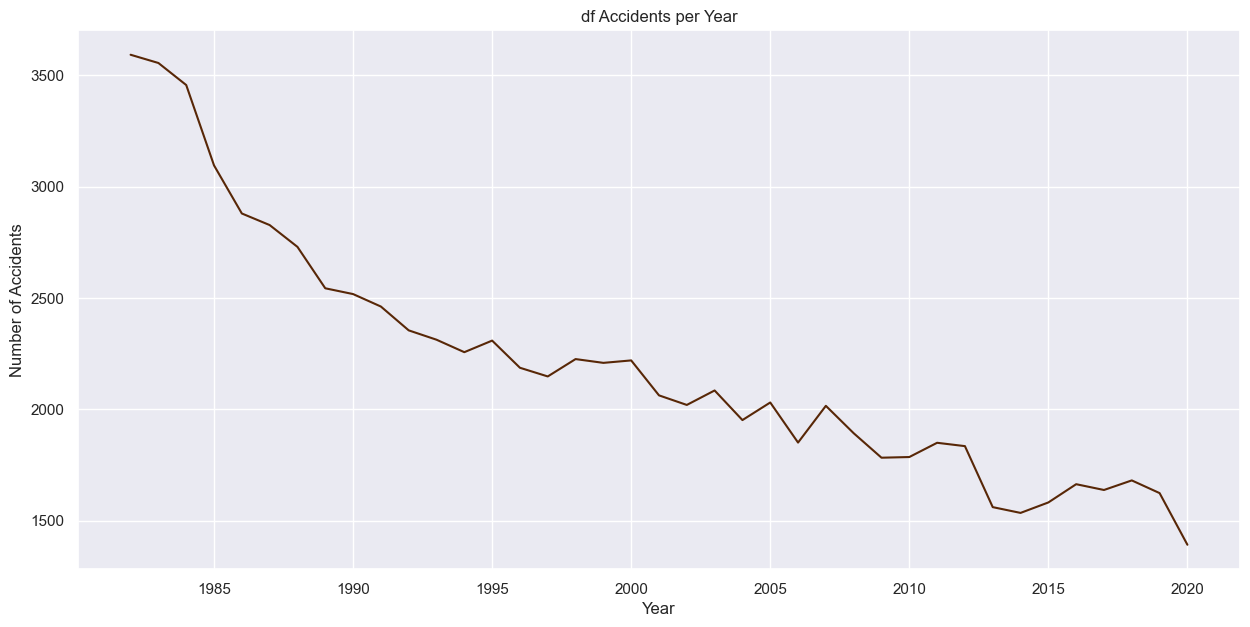

In [22]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

df['Year'] = df['Event.Date'].dt.year

Accidents = df.groupby(['Year'], as_index = False)['Event.Id'].count()

Accidents = Accidents[(Accidents['Year'] >= 1982) & (Accidents['Year'] <= 2020)]

plt.style.use( "seaborn-v0_8-dark" )

plt.figure(figsize = (15 , 7))

sns.set(style = 'darkgrid' )

sns.lineplot(x = 'Year', y = 'Event.Id', data = Accidents, color = '#582707' , markers = '*' )

plt.xlabel ('Year')
plt.ylabel('Number of Accidents')
plt.title('df Accidents per Year')
plt.show()

array([<Axes: ylabel='proportion'>], dtype=object)

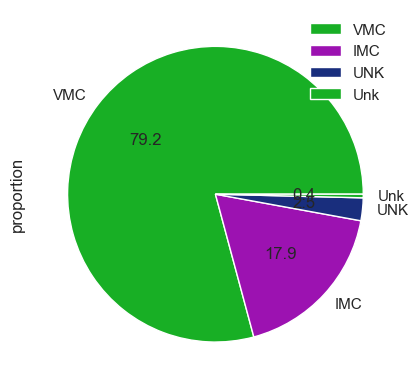

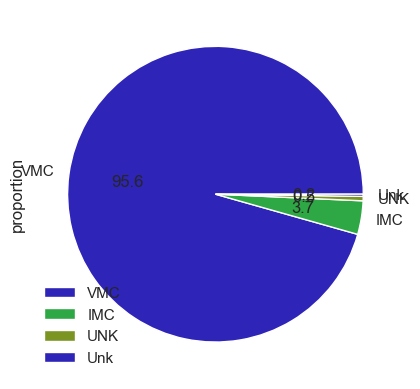

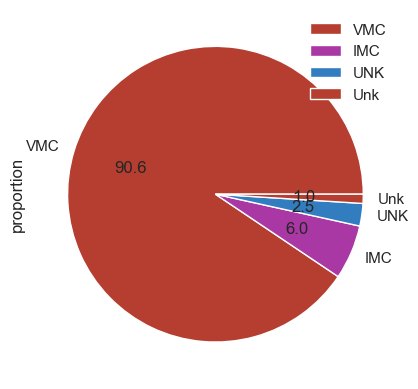

In [26]:
Weather_Damage = pd.DataFrame(df['Weather.Condition'].groupby(df['Aircraft.damage']).value_counts(normalize = True) * 100)

Weather_Damage.loc['Destroyed', :].plot(kind='pie', subplots=True, autopct='%.1f', colors = [ "#18AF25" , "#9C12B1" , "#192E7D" ] )

Weather_Damage.loc['Substantial', :].plot(kind='pie', subplots=True, autopct='%.1f', colors = [ "#2E24B7" , "#2DA844" , "#7C9522" ] )

Weather_Damage.loc['Minor', :].plot(kind='pie', subplots=True, autopct='%.1f', colors = [ "#B53E30" , "#AA38A4" , "#317DC0" ] )


<BarContainer object of 3 artists>

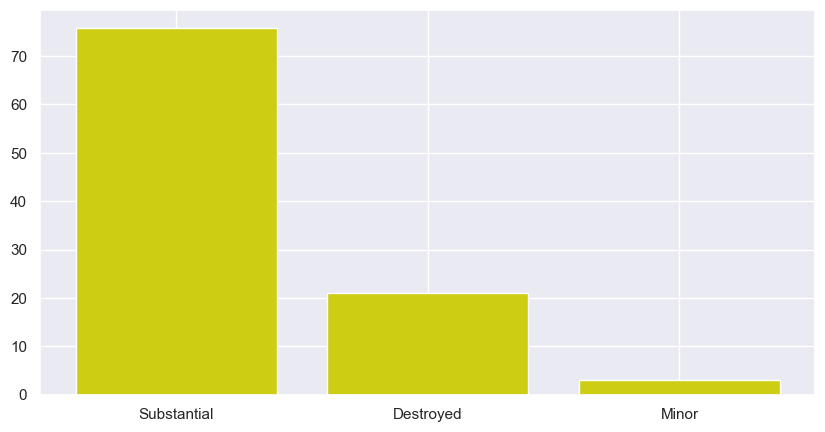

In [28]:
Damage = pd.DataFrame()
Damage['Damage_Sustained']= (df['Aircraft.damage'].value_counts(normalize = True)*100).index 
Damage['Values'] = (df['Aircraft.damage'].value_counts(normalize = True)*100).values 

plt.style.use( "seaborn-v0_8-dark" )

plt.figure(figsize = (10 ,5))

sns.set(style = 'darkgrid')

plt.bar(x = Damage.Damage_Sustained [0 : 3] , height = Damage.Values [ 0 : 3 ] , color = "#CDCD14" )


In [31]:
Incident = df[df['Investigation.Type']=='Incident']

Incident_injuries = Incident.groupby('Year')[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']].sum().reset_index()

Engine_Damage = pd.DataFrame(df[ 'Number.of.Engines'  ].groupby ( df[ 'Aircraft.damage'  ] ).value_counts ( ))


In [35]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Amateur.Built', 'Engine.Type', 'Schedule',
       'Purpose.of.flight', 'Air.carrier', 'Weather.Condition',
       'Broad.phase.of.flight', 'Number.of.Engines', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Year'],
      dtype='object')

In [39]:
for i in df :
    if df[i].dtype == 'object': 
        df[i] = df[i].str.title()
        
        if 'Unknown' in df[i].values: 
            df[i].replace({'Unknown':df[i].mode()[0]} , inplace = True)
            

df['Aircraft.damage'].replace({'Substantial': 1,'Minor' : 0,'Destroyed' : 2},inplace = True)

In [40]:
Categorical_Data = df.select_dtypes ( 'object' ).columns.to_list ( )

Categorical_Data

['Event.Id',
 'Investigation.Type',
 'Location',
 'Country',
 'Airport.Code',
 'Airport.Name',
 'Injury.Severity',
 'Aircraft.Category',
 'Make',
 'Amateur.Built',
 'Engine.Type',
 'Schedule',
 'Purpose.of.flight',
 'Air.carrier',
 'Weather.Condition',
 'Broad.phase.of.flight']

In [43]:
LE = LabelEncoder()

df[Categorical_Data] = df[Categorical_Data].apply(LE.fit_transform)

df

,Event.Id,Investigation.Type,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year
0,45208,0,1948-10-24,12924,203,7812,15614,42,2,0,6575,0,5,0,16,9397,1,2,1.0,2.0,0.000000,0.000000,0.00000,1948
1,45211,0,1962-07-19,2341,203,7812,15614,68,2,0,5276,0,5,0,16,9397,1,5,1.0,4.0,0.000000,0.000000,0.00000,1962
2,60529,0,1974-08-30,17279,203,7812,15614,60,2,0,1259,0,5,0,16,9397,0,2,1.0,3.0,0.279881,0.357061,5.32544,1974
3,45212,0,1977-06-19,6120,203,7812,15614,42,2,0,5774,0,5,0,16,9397,0,2,1.0,2.0,0.000000,0.000000,0.00000,1977
4,56803,0,1979-08-02,2965,203,7812,15614,1,2,0,1259,0,5,0,16,9397,2,0,1.0,1.0,2.000000,0.357061,0.00000,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,87944,0,2022-12-26,638,203,7812,15614,105,1,0,5276,0,5,0,16,9397,2,5,1.0,0.0,1.000000,0.000000,0.00000,2022
88885,87945,0,2022-12-26,8006,203,7812,15614,106,1,0,688,0,5,0,16,9397,2,5,1.0,0.0,0.000000,0.000000,0.00000,2022
88886,87947,0,2022-12-26,15164,203,8374,14804,106,1,0,287,0,5,0,16,9397,2,5,1.0,0.0,0.000000,0.000000,1.00000,2022
88887,87948,0,2022-12-26,12963,203,7812,15614,106,1,0,1259,0,5,0,16,7875,2,5,1.0,0.0,0.000000,0.000000,0.00000,2022


<Axes: >

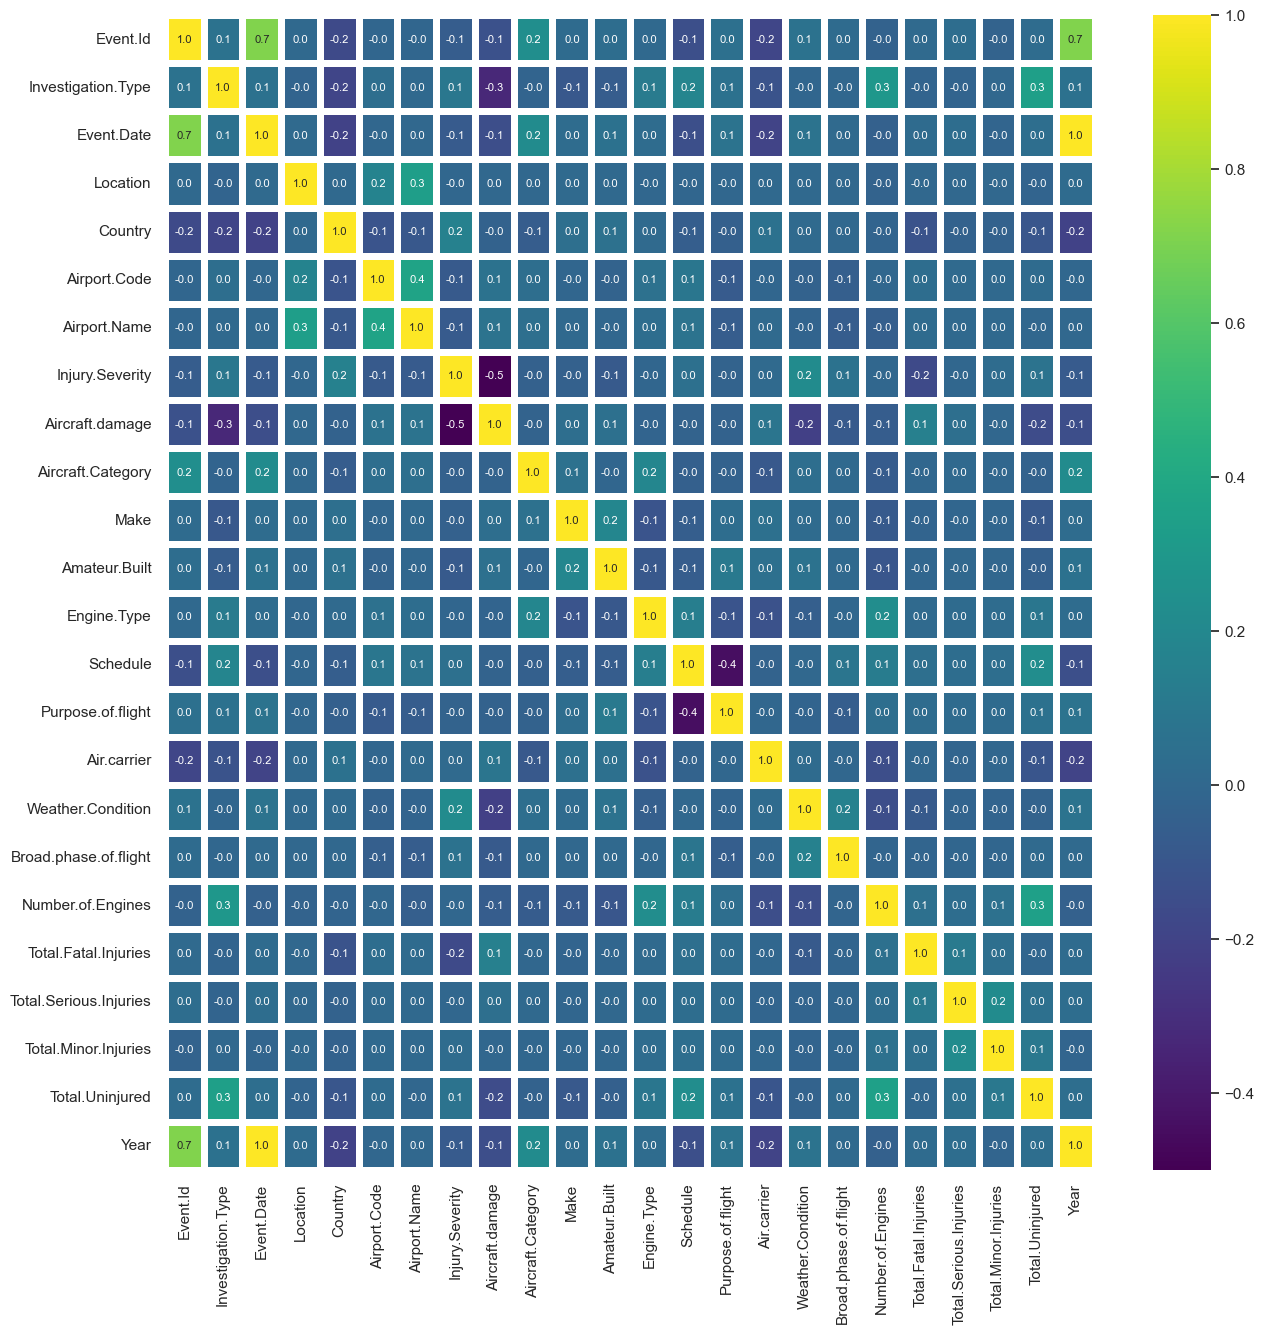

In [44]:
correlation = df.corr()
plt.figure(figsize=(15, 15))

sns.heatmap(correlation, annot=True, cmap='viridis', linewidths=5, fmt='.1f', cbar=True, annot_kws = {"size": 8})